In [ ]:
!pip install pyroomacoustics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.7.3-cp310-cp310-linux_x86_64.whl size=12136282 sha256=23c9e7e21ee4558ecc2be2bbef1427f0dc3e7d8818adb9a8084c5a356b353815
  Stored in directory: /root/.cache/pip/wheels/6b/f3/67/0d0c4c06234c59c14e5ccf72774bd5c5f1b43c3083043c7fb7
Successfully built pyroomacoustics


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
from scipy.io import wavfile

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Nouvelle section

# Nouvelle section

In [ ]:
path1 = "/content/drive/My Drive/Source/maroua.wav"
fs, audio1 = wavfile.read(path1)
print(np.shape(audio1))

NameError: ignored

In [ ]:
path2 = "/content/drive/My Drive/Source/Dris.wav"
fs, audio2 = wavfile.read(path2)
audio2=audio2
print(np.shape(audio2))
path3 = "/content/drive/My Drive/Source/romaila.wav"
fs, audio3 = wavfile.read(path2)
audio3=audio3
print(np.shape(audio3))

(433192,)
(433192,)


In [ ]:
# take the min
min_len = min(np.shape(audio1)[0], np.shape(audio2)[0])
# min_len = min(np.shape(audio1)[0], np.shape(audio2)[0],np.shape(audio3)[0],np.shape(audio4)[0])
audio1 = audio1[:min_len]
audio2 = audio2[:min_len]
audio3 = audio3[:min_len]
# audio4 = audio4[:min_len]

In [ ]:
print(np.shape(audio2))

(433192,)


In [ ]:
print(np.shape(audio1))

(433192,)


The desired RT60 was 0.15
The measured RT60 is 0.106


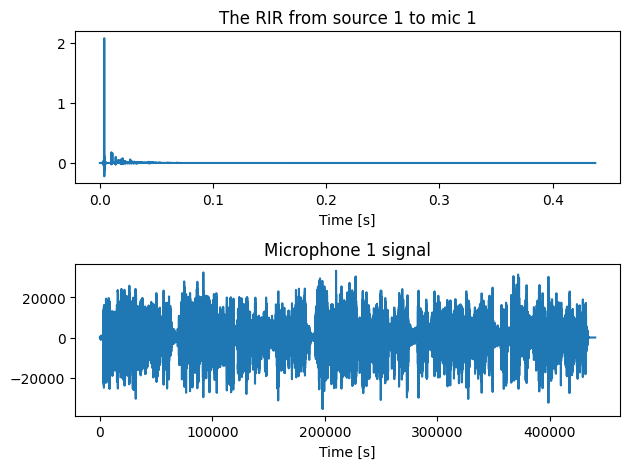

In [ ]:
# The desired reverberation time and dimensions of the room
rt60_tgt = 0.15 # seconds
room_dim = [5.5, 3.5, 2.75]  # meters

# We invert Sabine's formula to obtain the parameters for the ISM simulator
e_absorption, max_order = pra.inverse_sabine(rt60_tgt, room_dim)

# Create the room
room = pra.ShoeBox(
    room_dim, fs=fs, materials=pra.Material(e_absorption), max_order=max_order
)


# 2 sources
room.add_source([3.21, 1.921, 1.5], signal=audio1, delay=0)
room.add_source([2.36, 2.07, 1.5], signal=audio1, delay=0)
room.add_source([2.66, 1.25, 1.5], signal=audio2, delay=0)



mic_locs = np.c_[
     [2.75, 1.75, 1.4], [2.799, 1.75, 1.4], [2.5, 1.79, 1.4], [2.81, 1.8, 1.4],[2.69, 1.711, 1.4], [3.1, 1.58, 1.4],[3.2, 1.78, 1.4] # mic 1  # mic 2
]

# mic_locs = np.c_[
#     , # mic 1  # mic 2
# ]

# finally place the array in the room
room.add_microphone_array(mic_locs)

# Run the simulation (this will also build the RIR automatically)
room.simulate()

room.mic_array.to_wav(
    "/content/drive/My Drive/Source/marouadris.wav",
    norm=True,
    bitdepth=np.int16,
)



# measure the reverberation time
rt60 = room.measure_rt60()
print("The desired RT60 was {}".format(rt60_tgt))
print("The measured RT60 is {}".format(rt60[1, 0]))

# Create a plot
plt.figure()

# plot one of the RIR. both can also be plotted using room.plot_rir()
rir_1_0 = room.rir[0][0]
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(rir_1_0)) / room.fs, rir_1_0)
plt.title("The RIR from source 1 to mic 1")
plt.xlabel("Time [s]")

# plot signal at microphone 1
plt.subplot(2, 1, 2)
plt.plot(room.mic_array.signals[1, :])
plt.title("Microphone 1 signal")
plt.xlabel("Time [s]")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(room.rir[6][1])
df.to_csv('a72.csv')

In [ ]:
room_rir_0_0 = room.rir[0][0]
room_rir_1_0 = room.rir[3][0]
room_rir_0_1 = room.rir[0][1]
room_rir_1_1 = room.rir[3][1]

In [ ]:
import scipy.io as sio
sio.savemat('rir_SIMO.mat', {'rir':room.rir})

In [ ]:
path_gen = "/content/drive/My Drive/Source/marouadris.wav"
# import a mono wavfile as the source signal
# the sampling frequency should match that of the room
fs, gen = wavfile.read(path_gen)
np.shape(gen)

(439216, 7)

In [ ]:
from IPython.display import Audio
Audio(gen[:,5], rate=fs)